In [13]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Load data

In [55]:
data_path = 'raw_data'
file_list = os.listdir(data_path)
file_list = [file for file in file_list if '.csv' in file]
file_list

['open.csv',
 'close.csv',
 'one.csv',
 'four.csv',
 'two.csv',
 'three.csv',
 'ok.csv']

In [56]:
# combine data
df_list = []
for file in file_list:
    df = pd.read_csv(os.path.join(data_path, file))
    # get label according to file name
    label = file.split('.')[0]
    df['label'] = label
    df_list.append(df)
raw_df = pd.concat(df_list, ignore_index=True)
raw_df.head()

,Unnamed: 0,width_0_1,angle_0_1,width_1_2,angle_1_2,width_2_3,angle_2_3,width_0_4,angle_0_4,width_4_5,...,angle_14_15,width_1_4,angle_1_4,width_4_7,angle_4_7,width_7_10,angle_7_10,width_10_13,angle_10_13,label
0,0,0.799935,-0.992350,0.320462,-0.694752,0.259069,-0.907616,1.010849,-0.271794,0.541283,...,0.185835,0.668179,0.638861,0.272640,1.474334,0.252340,1.909964,0.272824,2.194263,open
1,1,0.798215,-0.998708,0.317215,-0.726368,0.268005,-0.867984,1.011160,-0.267527,0.556006,...,0.229731,0.676734,0.639405,0.268447,1.478244,0.251882,1.894032,0.274424,2.200009,open
2,2,0.796454,-1.000234,0.313367,-0.724054,0.259773,-0.882037,1.015159,-0.272141,0.550157,...,0.218105,0.676642,0.627779,0.273770,1.489613,0.251847,1.882406,0.270979,2.171112,open
3,3,0.807746,-1.008544,0.319696,-0.706434,0.256893,-0.861520,1.017020,-0.273409,0.552184,...,0.209133,0.684189,0.640353,0.275394,1.495358,0.253341,1.888151,0.280743,2.181772,open
4,4,0.806443,-1.000502,0.320478,-0.688972,0.257789,-0.838762,1.016486,-0.264551,0.552158,...,0.206652,0.684417,0.647856,0.266456,1.499891,0.257789,1.908040,0.272838,2.200043,open


## Data discovering

In [57]:
# unnamed column is the old index, so remove it
raw_df = raw_df.drop(columns=['Unnamed: 0'])
raw_df.head()

,width_0_1,angle_0_1,width_1_2,angle_1_2,width_2_3,angle_2_3,width_0_4,angle_0_4,width_4_5,angle_4_5,...,angle_14_15,width_1_4,angle_1_4,width_4_7,angle_4_7,width_7_10,angle_7_10,width_10_13,angle_10_13,label
0,0.799935,-0.992350,0.320462,-0.694752,0.259069,-0.907616,1.010849,-0.271794,0.541283,-0.129293,...,0.185835,0.668179,0.638861,0.272640,1.474334,0.252340,1.909964,0.272824,2.194263,open
1,0.798215,-0.998708,0.317215,-0.726368,0.268005,-0.867984,1.011160,-0.267527,0.556006,-0.121090,...,0.229731,0.676734,0.639405,0.268447,1.478244,0.251882,1.894032,0.274424,2.200009,open
2,0.796454,-1.000234,0.313367,-0.724054,0.259773,-0.882037,1.015159,-0.272141,0.550157,-0.133932,...,0.218105,0.676642,0.627779,0.273770,1.489613,0.251847,1.882406,0.270979,2.171112,open
3,0.807746,-1.008544,0.319696,-0.706434,0.256893,-0.861520,1.017020,-0.273409,0.552184,-0.107149,...,0.209133,0.684189,0.640353,0.275394,1.495358,0.253341,1.888151,0.280743,2.181772,open
4,0.806443,-1.000502,0.320478,-0.688972,0.257789,-0.838762,1.016486,-0.264551,0.552158,-0.110657,...,0.206652,0.684417,0.647856,0.266456,1.499891,0.257789,1.908040,0.272838,2.200043,open


In [58]:
raw_df.describe()

,width_0_1,angle_0_1,width_1_2,angle_1_2,width_2_3,angle_2_3,width_0_4,angle_0_4,width_4_5,angle_4_5,...,width_14_15,angle_14_15,width_1_4,angle_1_4,width_4_7,angle_4_7,width_7_10,angle_7_10,width_10_13,angle_10_13
count,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,...,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000
mean,0.753173,-0.614912,0.321728,0.230337,0.248292,0.728952,1.035061,-0.240176,0.515422,-0.280730,...,0.254814,-0.884596,0.482292,0.354406,0.252594,1.532015,0.245204,2.014836,0.251986,2.099854
std,0.129317,0.276553,0.056479,0.748617,0.063035,0.923612,0.050282,0.067157,0.180782,0.669540,...,0.068365,1.814481,0.138109,0.389157,0.065747,0.474425,0.057976,0.237107,0.043784,0.921093
min,0.137019,-1.352127,0.055770,-2.960500,0.021651,-3.062569,0.895229,-0.486096,0.007860,-3.017387,...,0.041912,-3.141235,0.054993,-0.891565,0.014438,-3.093684,0.059570,1.345134,0.082916,-3.120078
25%,0.674373,-0.824632,0.278393,-0.617885,0.205080,-0.155560,1.002144,-0.276875,0.426840,-0.365969,...,0.201031,-2.630401,0.383893,0.089522,0.223439,1.445221,0.218325,1.880463,0.230966,2.104729
50%,0.755665,-0.599691,0.323416,0.473266,0.256628,1.042379,1.033109,-0.251510,0.530799,-0.236185,...,0.265225,-0.172130,0.485419,0.360868,0.257127,1.564487,0.243730,1.959718,0.254925,2.197596
75%,0.814789,-0.456815,0.365619,0.868581,0.293428,1.476492,1.067069,-0.212141,0.607235,-0.104836,...,0.304025,0.411772,0.592387,0.685298,0.284072,1.689651,0.273883,2.061458,0.272367,2.371028
max,1.396821,0.877154,0.548032,2.217659,0.439950,2.781986,1.319932,0.118345,0.976820,3.057112,...,0.646813,3.137812,0.940862,1.953561,0.520685,3.124304,0.461413,3.131864,0.447121,3.136104


In [59]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   width_0_1    3236 non-null   float64
 1   angle_0_1    3236 non-null   float64
 2   width_1_2    3236 non-null   float64
 3   angle_1_2    3236 non-null   float64
 4   width_2_3    3236 non-null   float64
 5   angle_2_3    3236 non-null   float64
 6   width_0_4    3236 non-null   float64
 7   angle_0_4    3236 non-null   float64
 8   width_4_5    3236 non-null   float64
 9   angle_4_5    3236 non-null   float64
 10  width_5_6    3236 non-null   float64
 11  angle_5_6    3236 non-null   float64
 12  width_7_8    3236 non-null   float64
 13  angle_7_8    3236 non-null   float64
 14  width_8_9    3236 non-null   float64
 15  angle_8_9    3236 non-null   float64
 16  width_0_10   3236 non-null   float64
 17  angle_0_10   3236 non-null   float64
 18  width_10_11  3236 non-null   float64
 19  angle_

## Feature Importance

In [60]:
X_data = raw_df.values[:, :36]
Y_data = raw_df.values[:, 36]
print(X_data )
print(Y_data)

[[0.7999348518557268 -0.9923498965694312 0.3204621991964432 ...
  1.9099640963876905 0.27282393616333256 2.1942628835298006]
 [0.7982150104918352 -0.9987082778144928 0.3172149379893007 ...
  1.8940321336533943 0.2744238206273279 2.2000091742033683]
 [0.7964541429600782 -1.0002338153230317 0.313367034622553 ...
  1.8824059295595337 0.2709788317434899 2.1711119602854265]
 ...
 [0.7224079133657836 -0.8433032769508414 0.28860280376114433 ...
  2.1179497320136003 0.2590434097752833 2.564649811208001]
 [0.737780184404119 -0.8500561098214294 0.29627841446248576 ...
  2.1193457292454245 0.2563184076346928 2.5485242372467227]
 [0.7397092748646288 -0.8365543857436918 0.28994697313158097 ...
  2.125423260775073 0.2602499060826497 2.5721233399694747]]
['open' 'open' 'open' ... 'ok' 'ok' 'ok']


In [61]:
model = RandomForestClassifier(n_estimators=500)
model.fit(X_data, Y_data)

RandomForestClassifier(n_estimators=500)

In [62]:
# get importances
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01304
Feature: 1, Score: 0.01561
Feature: 2, Score: 0.00710
Feature: 3, Score: 0.05274
Feature: 4, Score: 0.01051
Feature: 5, Score: 0.07370
Feature: 6, Score: 0.02007
Feature: 7, Score: 0.01604
Feature: 8, Score: 0.07381
Feature: 9, Score: 0.04951
Feature: 10, Score: 0.05464
Feature: 11, Score: 0.05665
Feature: 12, Score: 0.04079
Feature: 13, Score: 0.02417
Feature: 14, Score: 0.05734
Feature: 15, Score: 0.03286
Feature: 16, Score: 0.01080
Feature: 17, Score: 0.00653
Feature: 18, Score: 0.03654
Feature: 19, Score: 0.01552
Feature: 20, Score: 0.02770
Feature: 21, Score: 0.04648
Feature: 22, Score: 0.00761
Feature: 23, Score: 0.00764
Feature: 24, Score: 0.02026
Feature: 25, Score: 0.04736
Feature: 26, Score: 0.00729
Feature: 27, Score: 0.05678
Feature: 28, Score: 0.01683
Feature: 29, Score: 0.03715
Feature: 30, Score: 0.01286
Feature: 31, Score: 0.01509
Feature: 32, Score: 0.00626
Feature: 33, Score: 0.00908
Feature: 34, Score: 0.00616
Feature: 35, Score: 0.00747


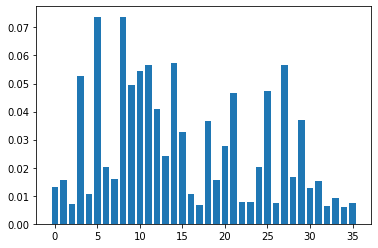

In [63]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [64]:
# compare widths and angles
width_importance = importance[0::2]
angle_importance = importance[1::2]
angle_importance

array([0.01560957, 0.05274324, 0.07369805, 0.016039  , 0.04950778,
       0.05664797, 0.02416992, 0.03286051, 0.00653486, 0.01552071,
       0.04647811, 0.00764371, 0.04735779, 0.05677738, 0.03715448,
       0.01508818, 0.00907533, 0.00747235])

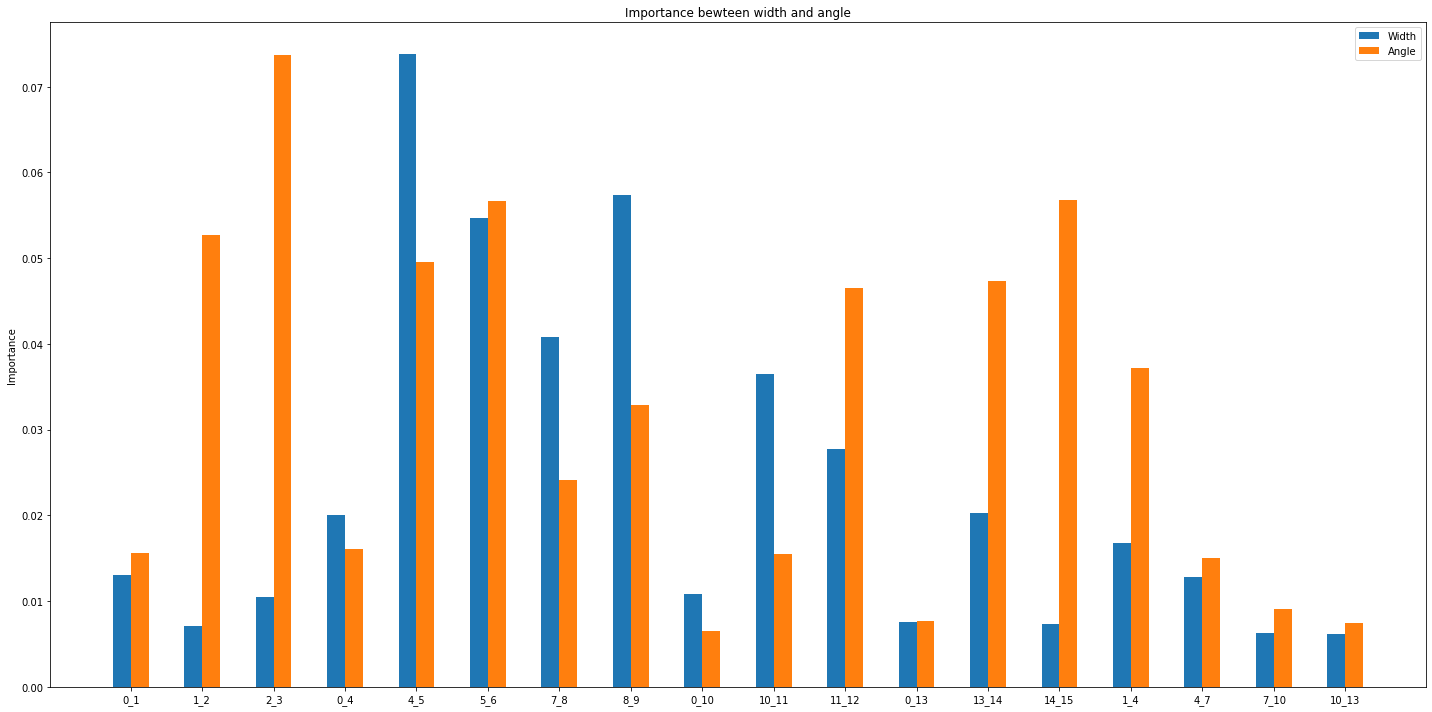

In [72]:
groups = []
for col in raw_df.columns[0:36:2]:
    col_names = col.split('_')
    new_col = f"{col_names[1]}_{col_names[2]}"
    groups.append(new_col)
    
x = np.arange(len(groups))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, width_importance, width, label='Width')
rects2 = ax.bar(x + width/2, angle_importance, width, label='Angle')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Importance')
ax.set_title('Importance bewteen width and angle')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend()

fig.tight_layout()

plt.show()

In [76]:
width_win_count = 0
for width, angle in zip(width_importance, angle_importance):
    if width > angle:
        width_win_count += 1
        
print('Width wins', width_win_count)
print('Angle wins', len(angle_importance) - width_win_count)

Width wins 6
Angle wins 12


**According the the graph and the metrics, it seems that angles are more importance than widths.**  

In [75]:
# sort the importance
importance_series = pd.Series(importance, index=raw_df.columns[:36])
importance_series.sort_values(ascending=False)

width_4_5      0.073813
angle_2_3      0.073698
width_8_9      0.057342
angle_14_15    0.056777
angle_5_6      0.056648
width_5_6      0.054641
angle_1_2      0.052743
angle_4_5      0.049508
angle_13_14    0.047358
angle_11_12    0.046478
width_7_8      0.040792
angle_1_4      0.037154
width_10_11    0.036544
angle_8_9      0.032861
width_11_12    0.027704
angle_7_8      0.024170
width_13_14    0.020262
width_0_4      0.020068
width_1_4      0.016827
angle_0_4      0.016039
angle_0_1      0.015610
angle_10_11    0.015521
angle_4_7      0.015088
width_0_1      0.013040
width_4_7      0.012859
width_0_10     0.010799
width_2_3      0.010505
angle_7_10     0.009075
angle_0_13     0.007644
width_0_13     0.007611
angle_10_13    0.007472
width_14_15    0.007288
width_1_2      0.007105
angle_0_10     0.006535
width_7_10     0.006264
width_10_13    0.006158
dtype: float64

#### According to the metrics and considering the position of each vector, these vectors will be ELIMINATED:
width_10_13, angle_10_13, width_7_10, angle_7_10, width_0_10, angle_0_10, width_1_2, width_2_3, width_0_13, angle_0_13, width_4_7